# (Denoising) Autoencoder Training on MNIST Images

In [9]:
# Load all relevant modules
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import numpy as np
from IPython import display
from skimage.util import random_noise

from torchvision import datasets
import torchvision.transforms as T

import res.viz_utils as vu
from res.plot_lib import set_default

set_default()

In [10]:
# Define constants
DATA_DIR = "data"
MODEL_DIR = "models"
BATCH_SIZE = 128
NUM_EPOCH = 10

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

### Load Training and Test Dataset

In [11]:
# Transform to (-1, 1) 
img_transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])

# Load train
train_data = datasets.MNIST(
    DATA_DIR, 
    train=True, 
    download=True, 
    transform=img_transform
)


# Load test
test_data = datasets.MNIST(
    DATA_DIR, 
    train=False, 
    download=True, 
    transform=img_transform
)



In [12]:
# Create train data loader
train_loader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

# create test data loader
test_loader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)


In [13]:
# Define model architecture
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, input_size),
            nn.Tanh(),
        )

    def forward(self, x):
        z = self.encoder(x)
        xr = self.decoder(z)
        return xr

In [14]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [15]:
# Define model and training configurations (loss, optimizer)
[n, dx1, dx2] = train_data.data.size()
input_size = dx1 * dx2
hidden_size = 30
model = Autoencoder(input_size, hidden_size).to(DEVICE)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


### Train Model

Epoch 1/10, Loss: 0.1502, Time: 3.59 sec
 -- model models/ae.pth stored
img_np : 0.0 1.0
img_np : 0.0 1.0
Epoch 2/10, Loss: 0.1005, Time: 3.43 sec
 -- model models/ae.pth stored
img_np : 0.0 1.0
img_np : 0.0 0.99999994
Epoch 3/10, Loss: 0.0880, Time: 3.44 sec
 -- model models/ae.pth stored
img_np : 0.0 1.0
img_np : 0.0 1.0
Epoch 4/10, Loss: 0.0799, Time: 3.50 sec
 -- model models/ae.pth stored
img_np : 0.0 1.0
img_np : 0.0 1.0
Epoch 5/10, Loss: 0.0744, Time: 3.46 sec
 -- model models/ae.pth stored
img_np : 0.0 1.0
img_np : 0.0 1.0
Epoch 6/10, Loss: 0.0658, Time: 3.47 sec
 -- model models/ae.pth stored
img_np : 0.0 1.0
img_np : 0.0 1.0
Epoch 7/10, Loss: 0.0645, Time: 3.55 sec
 -- model models/ae.pth stored
img_np : 0.0 1.0
img_np : 0.0 1.0
Epoch 8/10, Loss: 0.0653, Time: 3.47 sec
 -- model models/ae.pth stored
img_np : 0.0 1.0
img_np : 0.0 1.0
Epoch 9/10, Loss: 0.0654, Time: 3.41 sec
 -- model models/ae.pth stored
img_np : 0.0 1.0
img_np : 0.0 0.99999994
Epoch 10/10, Loss: 0.0603, Time:

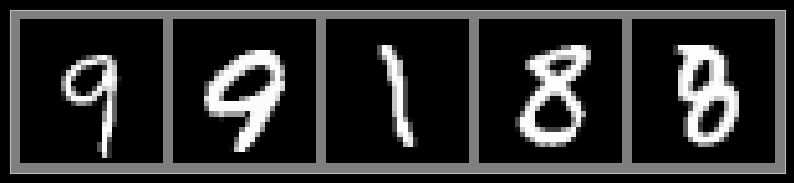

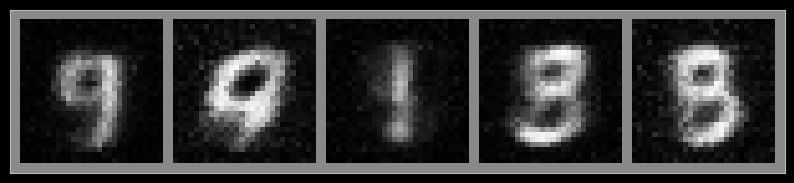

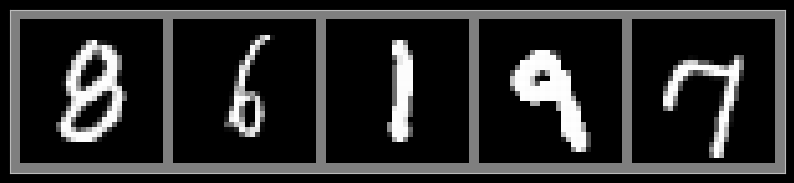

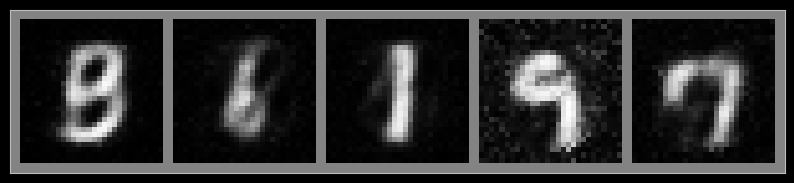

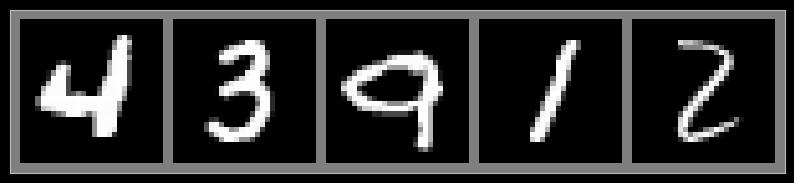

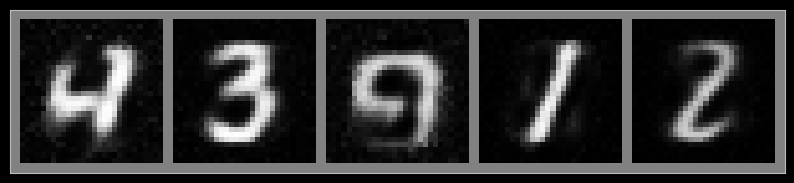

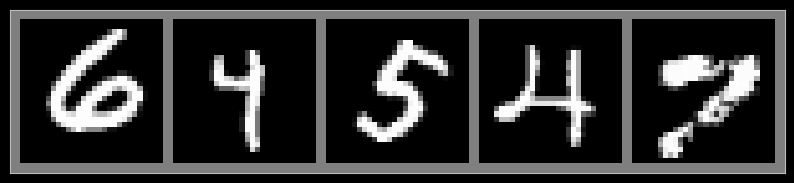

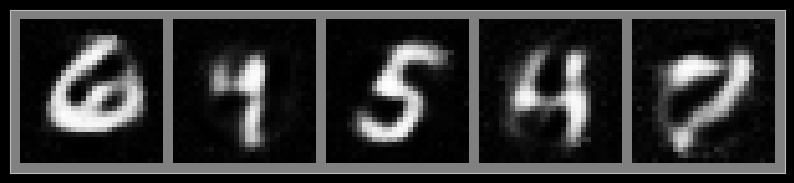

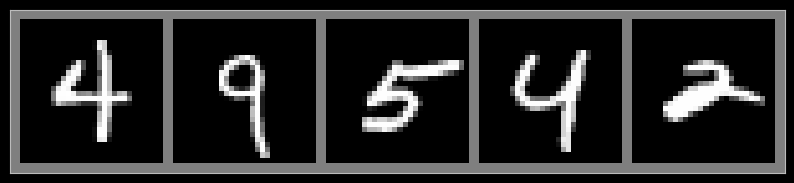

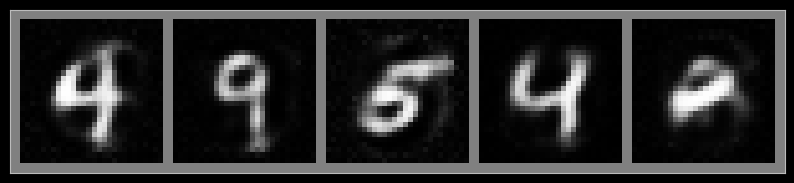

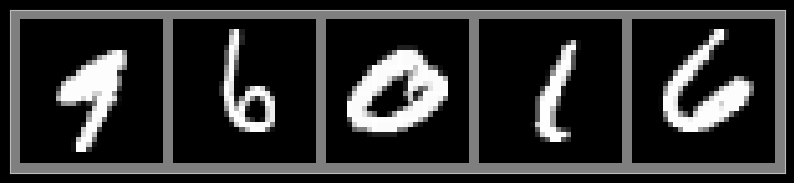

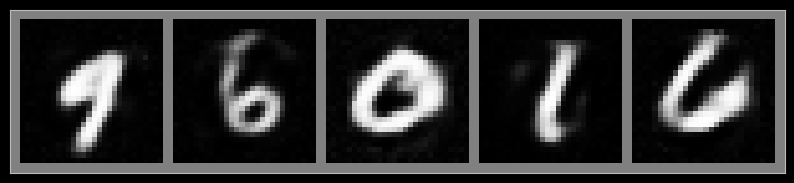

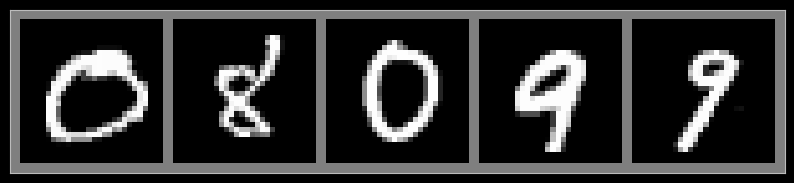

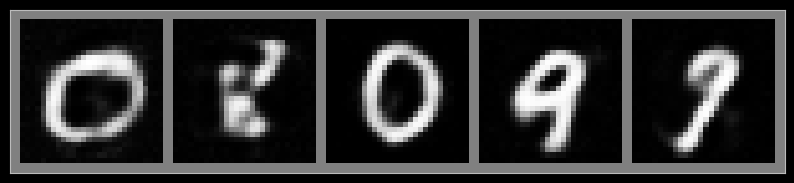

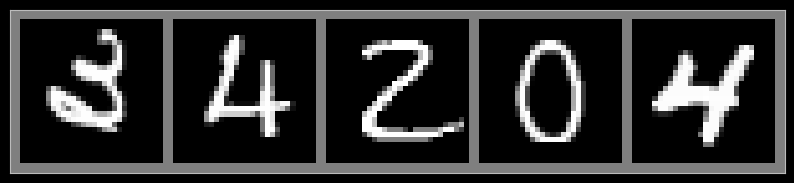

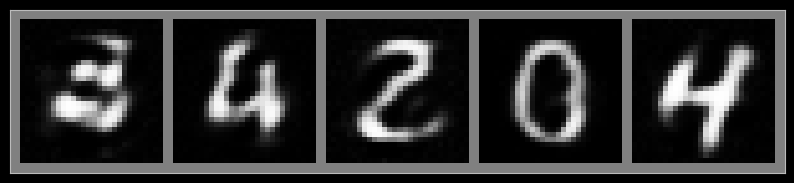

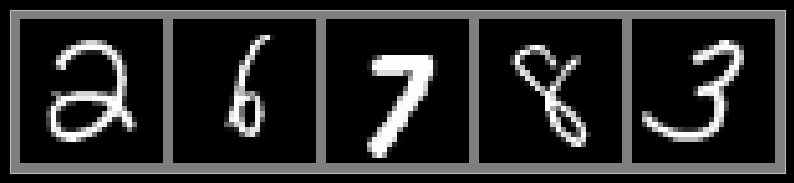

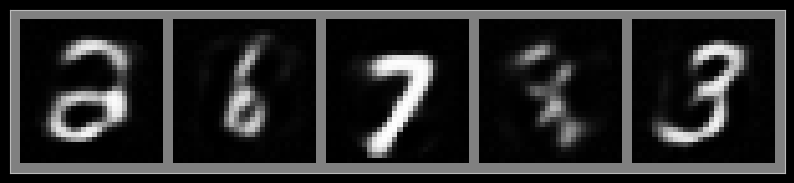

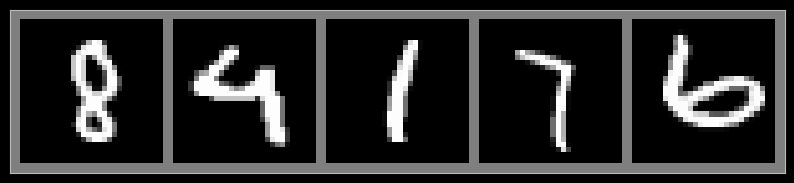

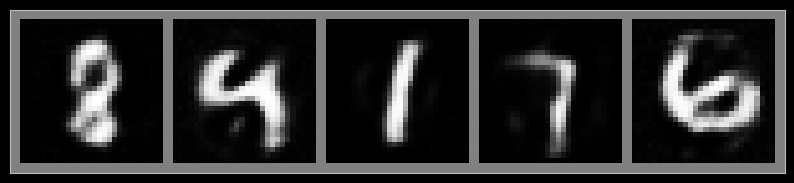

In [16]:
model_path = os.path.join(MODEL_DIR, "ae.pth")

for epoch in range(NUM_EPOCH):
    start_t = timer.time()
    for batch_idx, (X, _) in enumerate(train_loader):
        # Feed forward
        X = X.view(-1, input_size).to(DEVICE)
        Xr = model(X) # reconstruct input

        # Compute loss
        loss = criterion(Xr, X)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # end for
    elapsed_t = timer.time() - start_t

    print(f'Epoch {epoch+1}/{NUM_EPOCH}, Loss: {loss.item():.4f}, Time: {elapsed_t:.2f} sec')

    # Save model
    torch.save(model.state_dict(), model_path)
    print(f' -- model {model_path} stored')

    # Display images
    grid_x = vu.set_grid(X.view(-1, 1, dx1, dx2).cpu().detach().numpy(), num_cells=5)
    vu.show(grid_x)

    grid_xr = vu.set_grid(Xr.view(-1, 1, dx1, dx2).cpu().detach().numpy(), num_cells=5)
    vu.show(grid_xr)